In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import scale, StandardScaler
from sklearn.datasets import load_boston
from sklearn.linear_model import Perceptron, Ridge
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, \
    precision_recall_curve,confusion_matrix, r2_score, log_loss

from sklearn.svm import SVC
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import hstack
from sklearn.decomposition import PCA
from scipy.stats.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, \
    GradientBoostingRegressor
from sklearn.cross_validation import train_test_split

In [7]:
data = pd.read_csv('gbm-data.csv')

data

Activity        D1        D2    D3    D4        D5        D6        D7  \
0            1  0.000000  0.497009  0.10  0.00  0.132956  0.678031  0.273166   
1            1  0.366667  0.606291  0.05  0.00  0.111209  0.803455  0.106105   
2            1  0.033300  0.480124  0.00  0.00  0.209791  0.610350  0.356453   
3            1  0.000000  0.538825  0.00  0.50  0.196344  0.724230  0.235606   
4            0  0.100000  0.517794  0.00  0.00  0.494734  0.781422  0.154361   
5            0  0.133333  0.771035  0.20  0.25  0.122153  0.677398  0.267224   
6            1  0.066700  0.567401  0.10  0.00  0.116578  0.689802  0.274886   
7            1  0.133333  0.610057  0.15  0.00  0.105176  0.759602  0.313393   
8            1  0.000000  0.776816  0.05  0.00  0.458446  0.738631  0.246347   
9            0  0.100000  0.768150  0.10  0.25  0.262299  0.598972  0.377065   
10           1  0.000000  0.660210  0.00  0.00  0.383456  0.720737  0.222087   
11           0  0.166667  0.563907  0.00  0.25  0.254419  0.756516  0.228250   
12           1  0.133333  0.762576  0.35  0.00  0.287140  0.613026  0.200829   
13           1  0.066700  0.631525  0.05  0.00  0.234391  0.715887  0.181886   
14           1  0.066700  0.521589  0.00  0.00  0.227515  0.691512  0.264940   
15           1  0.100000  0.657124  0.15  0.00  0.447315  0.696919  0.193229   
16           1  0.100000  0.885983  0.05  0.25  0.524173  0.704125  0.162819   
17           1  0.000000  0.489133  0.10  0.00  0.088500  0.607943  0.347955   
18           1  0.000000  0.538825  0.00  0.25  0.237227  0.719965  0.382199   
19           0  0.033300  0.675038  0.10  0.00  0.235896  0.657470  0.212516   
20           0  0.100000  0.686625  0.25  0.00  0.104709  0.607495  0.356636   
21           1  0.166667  0.578646  0.00  0.00  0.173919  0.657420  0.317747   
22           0  0.100000  0.665270  0.10  0.25  0.251867  0.714488  0.170534   
23           0  0.066700  0.475563  0.00  0.25  0.401865  0.764165  0.218053   
24           0  0.000000  0.375649  0.00  0.00  0.242260  0.755498  0.226478   
25           1  0.000000  0.534259  0.05  0.00  0.111008  0.622691  0.400883   
26           1  0.066700  0.542305  0.15  0.00  0.183809  0.648122  0.354422   
27           0  0.166667  0.722598  0.15  0.00  0.194978  0.797810  0.187969   
28           1  0.166667  0.638055  0.05  0.00  0.138331  0.658073  0.313260   
29           1  0.066700  0.565660  0.05  0.00  0.133900  0.602021  0.311601   
...        ...       ...       ...   ...   ...       ...       ...       ...   
3721         1  0.033300  0.481720  0.00  0.00  0.114101  0.719833  0.293265   
3722         1  0.000000  0.694186  0.15  0.00  0.293354  0.636711  0.286999   
3723         0  0.166667  0.691269  0.15  0.25  0.087200  0.833496  0.106056   
3724         1  0.133333  0.559984  0.10  0.00  0.107175  0.622075  0.333753   
3725         1  0.033300  0.438248  0.00  0.00  0.110333  0.609393  0.405318   
3726         0  0.200000  0.653780  0.00  0.50  0.072600  0.647421  0.321597   
3727         0  0.066700  0.567011  0.00  0.00  0.383932  0.723871  0.254747   
3728         1  0.033300  0.714933  0.15  0.25  0.150352  0.719908  0.310732   
3729         0  0.000000  0.372990  0.00  0.00  0.202711  0.732980  0.255754   
3730         1  0.066700  0.575001  0.00  0.00  0.269273  0.609576  0.330971   
3731         0  0.000000  0.566193  0.20  0.00  0.157010  0.645297  0.282444   
3732         1  0.000000  0.679264  0.10  0.00  0.208038  0.609945  0.306327   
3733         0  0.166667  0.515541  0.00  0.00  0.117869  0.725294  0.201651   
3734         1  0.033300  0.506224  0.05  0.00  0.127842  0.709754  0.251244   
3735         1  0.000000  0.719994  0.20  0.00  0.145131  0.658951  0.320307   
3736         0  0.033300  0.688500  0.10  0.25  0.165650  0.722846  0.225075   
3737         0  0.133333  0.760487  0.10  0.25  0.214941  0.660811  0.239333   
3738         0  0.133333  0.819665  0.20  0.50  0.159593  0.700822  0.212851   
3739  

In [16]:
Y = data[data.columns[0]]

Y

0       1
1       1
2       1
3       1
4       0
5       0
6       1
7       1
8       1
9       0
10      1
11      0
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      0
20      0
21      1
22      0
23      0
24      0
25      1
26      1
27      0
28      1
29      1
       ..
3721    1
3722    1
3723    0
3724    1
3725    1
3726    0
3727    0
3728    1
3729    0
3730    1
3731    0
3732    1
3733    0
3734    1
3735    1
3736    0
3737    0
3738    0
3739    1
3740    1
3741    0
3742    0
3743    0
3744    0
3745    1
3746    1
3747    1
3748    0
3749    1
3750    0
Name: Activity, Length: 3751, dtype: int64

In [17]:
X = data[[x for x in data.columns if x != data.columns[0]]]

X

D1        D2    D3    D4        D5        D6        D7        D8  \
0     0.000000  0.497009  0.10  0.00  0.132956  0.678031  0.273166  0.585445   
1     0.366667  0.606291  0.05  0.00  0.111209  0.803455  0.106105  0.411754   
2     0.033300  0.480124  0.00  0.00  0.209791  0.610350  0.356453  0.517720   
3     0.000000  0.538825  0.00  0.50  0.196344  0.724230  0.235606  0.288764   
4     0.100000  0.517794  0.00  0.00  0.494734  0.781422  0.154361  0.303809   
5     0.133333  0.771035  0.20  0.25  0.122153  0.677398  0.267224  0.611112   
6     0.066700  0.567401  0.10  0.00  0.116578  0.689802  0.274886  0.548509   
7     0.133333  0.610057  0.15  0.00  0.105176  0.759602  0.313393  0.491790   
8     0.000000  0.776816  0.05  0.00  0.458446  0.738631  0.246347  0.067800   
9     0.100000  0.768150  0.10  0.25  0.262299  0.598972  0.377065  0.394514   
10    0.000000  0.660210  0.00  0.00  0.383456  0.720737  0.222087  0.355963   
11    0.166667  0.563907  0.00  0.25  0.254419  0.756516  0.228250  0.444385   
12    0.133333  0.762576  0.35  0.00  0.287140  0.613026  0.200829  0.484594   
13    0.066700  0.631525  0.05  0.00  0.234391  0.715887  0.181886  0.358794   
14    0.066700  0.521589  0.00  0.00  0.227515  0.691512  0.264940  0.067800   
15    0.100000  0.657124  0.15  0.00  0.447315  0.696919  0.193229  0.091400   
16    0.100000  0.885983  0.05  0.25  0.524173  0.704125  0.162819  0.532092   
17    0.000000  0.489133  0.10  0.00  0.088500  0.607943  0.347955  0.585445   
18    0.000000  0.538825  0.00  0.25  0.237227  0.719965  0.382199  0.272145   
19    0.033300  0.675038  0.10  0.00  0.235896  0.657470  0.212516  0.561463   
20    0.100000  0.686625  0.25  0.00  0.104709  0.607495  0.356636  0.585445   
21    0.166667  0.578646  0.00  0.00  0.173919  0.657420  0.317747  0.438616   
22    0.100000  0.665270  0.10  0.25  0.251867  0.714488  0.170534  0.469871   
23    0.066700  0.475563  0.00  0.25  0.401865  0.764165  0.218053  0.131076   
24    0.000000  0.375649  0.00  0.00  0.242260  0.755498  0.226478  0.077900   
25    0.000000  0.534259  0.05  0.00  0.111008  0.622691  0.400883  0.633032   
26    0.066700  0.542305  0.15  0.00  0.183809  0.648122  0.354422  0.585445   
27    0.166667  0.722598  0.15  0.00  0.194978  0.797810  0.187969  0.388972   
28    0.166667  0.638055  0.05  0.00  0.138331  0.658073  0.313260  0.433396   
29    0.066700  0.565660  0.05  0.00  0.133900  0.602021  0.311601  0.585445   
...        ...       ...   ...   ...       ...       ...       ...       ...   
3721  0.033300  0.481720  0.00  0.00  0.114101  0.719833  0.293265  0.557464   
3722  0.000000  0.694186  0.15  0.00  0.293354  0.636711  0.286999  0.395152   
3723  0.166667  0.691269  0.15  0.25  0.087200  0.833496  0.106056  0.442863   
3724  0.133333  0.559984  0.10  0.00  0.107175  0.622075  0.333753  0.584860   
3725  0.033300  0.438248  0.00  0.00  0.110333  0.609393  0.405318  0.651631   
3726  0.200000  0.653780  0.00  0.50  0.072600  0.647421  0.321597  0.592083   
3727  0.066700  0.567011  0.00  0.00  0.383932  0.723871  0.254747  0.067800   
3728  0.033300  0.714933  0.15  0.25  0.150352  0.719908  0.310732  0.497091   
3729  0.000000  0.372990  0.00  0.00  0.202711  0.732980  0.255754  0.513623   
3730  0.066700  0.575001  0.00  0.00  0.269273  0.609576  0.330971  0.490094   
3731  0.000000  0.566193  0.20  0.00  0.157010  0.645297  0.282444  0.557938   
3732  0.000000  0.679264  0.10  0.00  0.208038  0.609945  0.306327  0.760400   
3733  0.166667  0.515541  0.00  0.00  0.117869  0.725294  0.201651  0.155831   
3734  0.033300  0.506224  0.05  0.00  0.127842  0.709754  0.251244  0.533042   
3735  0.000000  0.719994  0.20  0.00  0.145131  0.658951  0.320307  0.589026   
3736  0.033300  0.688500  0.10  0.25  0.165650  0.722846  0.225075  0.525203   
3737  0.133333  0.760487  0.10  0.25  0.214941  0.660811  0.239333  0.523520   
3738  0.133333  0.819665  0.20  0.50  0.159593  0.700822  0.212851  0.543910   
3739  0.0000

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size = 0.8, random_state = 241)

In [32]:
gbc = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate = 0.1)

In [33]:
gbc.fit(X_train, Y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3199           13.00s
         2           1.2645           12.63s
         3           1.2170           12.30s
         4           1.1775           12.24s
         5           1.1404           12.38s
         6           1.1106           12.30s
         7           1.0844           12.20s
         8           1.0617           12.12s
         9           1.0411           12.12s
        10           1.0223           12.11s
        20           0.8864           10.78s
        30           0.7844            9.78s
        40           0.7176            8.85s
        50           0.6590            8.34s
        60           0.6120            7.71s
        70           0.5599            7.58s
        80           0.5242            7.17s
        90           0.4829            6.86s
       100           0.4473            6.31s
       200           0.2379            1.96s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=241, subsample=1.0,
              verbose=True, warm_start=False)

0.582 1


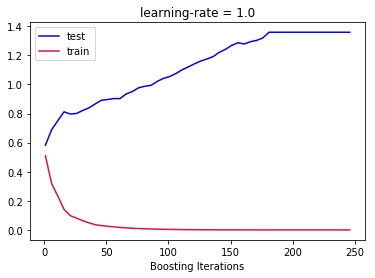

0.558 7


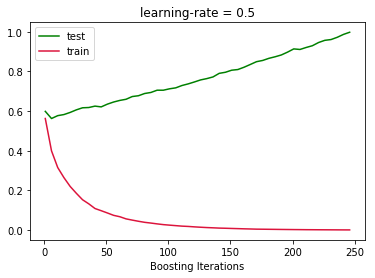

0.542 11


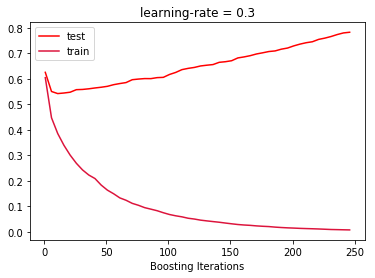

0.531 37


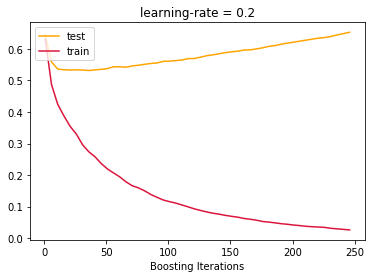

0.527 52


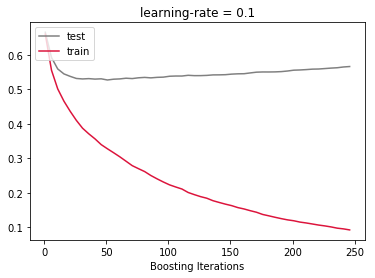

In [128]:
original_params = {'n_estimators': 250, 'verbose': False, 'random_state': 241}

learning_rate = [1, 0.5, 0.3, 0.2, 0.1]

plt.figure()

for label, color, label2, color2, setting in [ ('test' , 'blue', 'train', 'Crimson',{'learning_rate': 1.0}),
                             ('test' , 'green', 'train', 'Crimson',{'learning_rate': 0.5}),
                             ('test' , 'red', 'train', 'Crimson',{'learning_rate': 0.3}),
                             ('test' , 'orange', 'train', 'Crimson',{'learning_rate': 0.2}),
                             ('test' , 'gray', 'train', 'Crimson',{'learning_rate': 0.1}),]:
    
    params = dict(original_params)
    params.update(setting)
    
    gbc = GradientBoostingClassifier(**params)
    
    gbc.fit(X_train, Y_train)
    
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)
    
    train_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)
    
    for i, y_pred in enumerate(gbc.staged_decision_function(X_test)):
        
        u = 1 / (1 + math.e**(-y_pred))
        
        test_deviance[i] = log_loss(Y_test, u)
        
    for i, y_pred in enumerate(gbc.staged_decision_function(X_train)):
        
        u = 1 / (1 + math.e**(-y_pred))
        
        train_deviance[i] = log_loss(Y_train, u)    
        
    minerr = test_deviance[0]

    n = 1

    for i in range(len(test_deviance)):

        if test_deviance[i] < minerr:

            minerr = test_deviance[i]

            n = i+1
            
    print(round(minerr,3), n)
        
    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', color=color, label=label)
    
    plt.plot((np.arange(train_deviance.shape[0]) + 1)[::5], train_deviance[::5],
            '-', color=color2, label=label2)
    
    plt.legend(loc='upper left')
    plt.xlabel('Boosting Iterations')
    plt.title('learning-rate = ' + str(params['learning_rate']))
    

    plt.show()

In [109]:
learning_rate = [1, 0.5, 0.3, 0.2, 0.1]

for label, color, setting in [ ('learning_rate=1' , 'blue',{'learning_rate': 0.2})]:
    
    params = dict(original_params)
    params.update(setting)
    
    gbc = GradientBoostingClassifier(**params)
    
    gbc.fit(X_train, Y_train)
    
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)
    
    for i, y_pred in enumerate(gbc.staged_decision_function(X_test)):
        
        u = 1 / (1 + math.e**(-y_pred))
        
        test_deviance[i] = log_loss(Y_test, u)

      Iter       Train Loss   Remaining Time 
         1           1.2613           12.49s
         2           1.1715           11.38s
         3           1.1009           11.02s
         4           1.0529           10.85s
         5           1.0130           10.81s
         6           0.9740           10.79s
         7           0.9475           10.15s
         8           0.9197           10.13s
         9           0.8979            9.71s
        10           0.8730            9.84s
        20           0.7207            8.50s
        30           0.6055            7.78s
        40           0.5244            7.46s
        50           0.4501            7.07s
        60           0.3908            6.85s
        70           0.3372            6.43s
        80           0.3009            5.97s
        90           0.2603            5.59s
       100           0.2327            5.19s
       200           0.0835            1.61s


In [112]:
minerr = test_deviance[0]

n = 1

for i in range(len(test_deviance)):
    
    if test_deviance[i] < minerr:
        
        minerr = test_deviance[i]
        
        n = i+1
        
print(round(minerr,2), n)

0.53 37


In [115]:
gbc = GradientBoostingClassifier(random_state=241, n_estimators=37)

gbc.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=37,
              presort='auto', random_state=241, subsample=1.0, verbose=0,
              warm_start=False)

In [116]:
gbc.predict_proba(X_test)

array([[0.26601046, 0.73398954],
       [0.58472681, 0.41527319],
       [0.58835844, 0.41164156],
       ...,
       [0.64444892, 0.35555108],
       [0.76444669, 0.23555331],
       [0.16187002, 0.83812998]])

In [118]:
round(log_loss(Y_test, gbc.predict_proba(X_test)),2)

0.53